In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset')

room_types = os.listdir('C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(room_types))

['Bedroom', 'Dining', 'Living']
Types of rooms found:  3


In [2]:
rooms = []

for item in room_types:   #loop for folder
    
    #Get all the file names
    all_rooms = os.listdir('C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset' + '/' +item)
    
    #Add them to the list
    for room in all_rooms:
        rooms.append((item, str('C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset' + '/' +item) + '/' + room))
        #print(rooms[:1])

rooms

[('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/1.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/10.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/2.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/3.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/4.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/5.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/6.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/7.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/8.jpg'),
 ('Bedroom', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Bedroom/9.jpg'),
 ('Dining', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Dining/1.jpg'),
 ('Dining', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Dining/10.jpg'),
 ('Dining', 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/Dining

In [3]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())

  room type                                              image
0   Bedroom  C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset...
1   Bedroom  C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset...
2   Bedroom  C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset...
3   Bedroom  C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset...
4   Bedroom  C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset...


In [4]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

Total number of rooms in the dataset:  30
rooms in each category: 
Bedroom    10
Living     10
Dining     10
Name: room type, dtype: int64


In [5]:
import cv2
path = 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/'

im_size = 224

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels

['Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Bedroom',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Dining',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living',
 'Living']

In [6]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape

(30, 224, 224, 3)

In [7]:
images = images.astype('float32') / 255.0  #Normalization

In [8]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
y=rooms_df['room type'].values
#print(y[:5])

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
#print (y)

y=y.reshape(-1,1)
onehotencoder = OneHotEncoder()  
#Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y).toarray()
Y.shape  #(393, 3)

(30, 3)

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.15, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(25, 224, 224, 3)
(25, 3)
(5, 224, 224, 3)
(5, 3)


# With keras

In [15]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

# Identity block

In [16]:
def identity_block(X, f, filters):

    # Retrieve Filters
    F1, F2, F3 = filters  # F1=64,F2=64,256
    
    X_shortcut = X
    
    # First  layer
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    
    # Second  layer
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Third  layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    # Final step: Add shortcut value to F(X), and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

# Convolutional Block

In [17]:
def convolutional_block(X, f, filters, s = 2):

    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

# Creating ResNet50

In [18]:
def ResNet50(input_shape=(224, 224, 3), classes=3):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) 
    X = BatchNormalization(axis=3)(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
   
    # below 3 lines are the conv layers from convolutional_block function defined above
    #X = Conv2D(F1, (1, 1), strides = (s,s))(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256]) 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
  
    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)


    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [19]:
model = ResNet50(input_shape = (224, 224, 3), classes = 3)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
___________________________________________________________________________________________

In [22]:
model.fit(train_x, train_y, epochs = 5)

Train on 25 samples
Epoch 1/5
25/25 [==============================] - 33s 1s/sample - loss: 1.5390 - accuracy: 0.4000
Epoch 2/5
25/25 [==============================] - 11s 440ms/sample - loss: 17.6101 - accuracy: 0.6000
Epoch 3/5
25/25 [==============================] - 11s 425ms/sample - loss: 11.1580 - accuracy: 0.3200
Epoch 4/5
25/25 [==============================] - 11s 432ms/sample - loss: 4.4145 - accuracy: 0.4800
Epoch 5/5
25/25 [==============================] - 10s 418ms/sample - loss: 0.9759 - accuracy: 0.5600


In [23]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/1 [======================================================================================================================================================] - 2s 314ms/sample - loss: 1.2841 - accuracy: 0.4000
Loss = 1.2840591669082642
Test Accuracy = 0.4


# Testing model on unseen data 

Input image shape: (1, 224, 224, 3)
[[0. 0. 1.]]


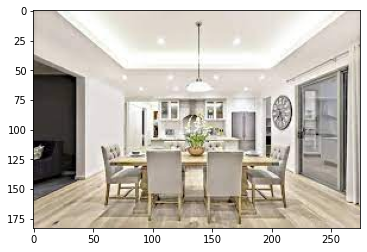

In [26]:
from matplotlib.pyplot import imread
img_path = 'C:/Users/Jerish/OneDrive/Desktop/Rooms_dataset/dining.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

it means that this image belongs to third class, which is living room